# Data Mining Versuch Document Classification
* Autor: Prof. Dr. Johannes Maucher
* Datum: 06.11.2015

[Übersicht Versuche im Data Mining Praktikum](http://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Dokumentklassifikation: Klassifikation von Dokumenten, insbesondere Emails und RSS Feed
* Naive Bayes Classifier: Weit verbreitete Klassifikationsmethode, welche unter bestimmten Randbedingungen sehr gut skaliert.


## Theorie zur Vorbereitung
### Parametrische Klassifikation und Naive Bayes Methode
Klassifikatoren müssen zu einer gegebenen Eingabe $\underline{x}$ die zugehörige Klasse $C_i$ bestimmen. Mithilfe der Wahrscheinlichkeitstheorie kann diese Aufgabe wie folgt beschrieben werden: Bestimme für alle möglichen Klassen $C_i$ die bedingte Wahrscheinlichkeit $P(C_i | \underline{x})$, also die Wahrscheinlichkeit, dass die gegebene Eingabe $\underline{x}$ in Klasse $C_i$ fällt. Wähle dann die Klasse aus, für welche diese Wahrscheinlichkeit maximal ist.

Die Entscheidungsregeln von Klassifikatoren können mit Methoden des "überwachten Lernens" aus Trainingsdaten ermittelt werden. Im Fall des **parametrischen Lernens** kann aus den Trainingsdaten die sogenannte **Likelihood-Funktion** $p(\underline{x} \mid C_i)$ bestimmt werden. _Anmerkung:_ Allgemein werden mit $p(...)$ kontinuierliche Wahrscheinlichkeitsfunktionen und mit $P(...)$ diskrete Wahrscheinlichkeitswerte bezeichnet. 

Mithilfe der **Bayes-Formel**
$$
P(C_i \mid \underline{x}) = \frac{p(\underline{x} \mid C_i) \cdot P(C_i)}{p(\underline{x})}
$$

kann aus der Likelihood die **a-posteriori-Wahrscheinlichkeit $P(C_i \mid \underline{x})$** berechnet werden. Darin wird $P(C_i)$ die **a-priori-Wahrscheinlichkeit** und $p(\underline{x})$ die **Evidenz** genannt. Die a-priori-Wahrscheinlichkeit kann ebenfalls aus den Trainingsdaten ermittelt werden. Die Evidenz ist für die Klassifikationsentscheidung nicht relevant, da sie für alle Klassen $C_i$ gleich groß ist.

Die Berechnung der Likelihood-Funktion $p(\underline{x} \mid C_i)$ ist dann sehr aufwendig, wenn $\underline{x}=(x_1,x_2,\ldots,x_Z)$ ein Vektor von voneinander abhängigen Variablen $x_i$ ist. Bei der **Naive Bayes Classification** wird jedoch von der vereinfachenden Annahme ausgegangen, dass die Eingabevariabeln $x_i$ voneinander unabhängig sind. Dann vereinfacht sich die bedingte Verbundwahrscheinlichkeits-Funktion $p(x_1,x_2,\ldots,x_Z \mid C_i)$ zu:

$$
p(x_1,x_2,\ldots,x_Z \mid C_i)=\prod\limits_{j=1}^Z p(x_j | C_i)
$$

### Anwendung der Naive Bayes Methode in der Dokumentklassifikation
Auf der rechten Seite der vorigen Gleichung stehen nur noch von den jeweils anderen Variablen unabhängige bedingte Wahrscheinlichkeiten. Im Fall der Dokumentklassifikation sind die einzelnen Worte die Variablen, d.h. ein Ausdruck der Form $P(x_j | C_i)$ gibt an mit welcher Wahrscheinlichkeit ein Wort $x_j=w$ in einem Dokument der Klasse $C_i$ vorkommt. 
Die Menge aller Variablen $\left\{x_1,x_2,\ldots,x_Z \right\}$ ist dann die Menge aller Wörter im Dokument. Damit gibt die linke Seite in der oben gegebenen Gleichung die *Wahrscheinlichkeit, dass die Wörter $\left\{x_1,x_2,\ldots,x_Z \right\}$ in einem Dokument der Klasse $C_i$ vorkommen*, an.

Für jedes Wort _w_ wird aus den Trainingsdaten die Wahrscheinlichkeit $P(w|G)$, mit der das Wort in Dokumenten der Kategorie _Good_ und die Wahrscheinlichkeit $P(w|B)$ mit der das Wort in Dokumenten der Kategorie _Bad_ auftaucht ermittelt. Trainingsdokumente werden in der Form

$$
tD=(String,Category)
$$
eingegeben. 

Wenn 

* mit der Variable $fc(w,cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ in denen das Wort $w$ enthalten ist
* mit der Variable $cc(cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ 

gezählt wird, dann ist 

$$
P(w|G)=\frac{fc(w,G)}{cc(G)} \quad \quad P(w|B)=\frac{fc(w,B)}{cc(B)}.
$$

Wird nun nach der Eingabe von $L$ Trainingsdokumenten ein neu zu klassifizierendes Dokument $D$ eingegeben und sei $W(D)$ die Menge aller Wörter in $D$, dann berechnen sich unter der Annahme, dass die Worte in $W(D)$ voneinander unabhängig sind (naive Bayes Annahme) die a-posteriori Wahrscheinlichkeiten zu:

$$
P(G|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | G) \right) \cdot P(G)}{p(D)}
$$
und
$$
P(B|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | B) \right) \cdot P(B)}{p(D)}.
$$

Die hierfür notwendigen a-priori-Wahrscheinlichkeiten berechnen sich zu 

$$
P(G)=\frac{cc(G)}{L}
$$
und
$$
P(B)=\frac{cc(B)}{L}
$$

Die Evidenz $p(D)$ beeinflusst die Entscheidung nicht und kann deshalb ignoriert werden.


## Vor dem Versuch zu klärende Fragen


1. Wie wird ein Naive Bayes Classifier trainiert? Was muss beim Training für die spätere Klassifikation abgespeichert werden?
2. Wie teilt ein Naiver Bayes Classifier ein neues Dokument ein?
3. Welche naive Annahme liegt dem Bayes Classifier zugrunde? Ist diese Annahme im Fall der Dokumentklassifikation tatsächlich gegeben?
4. Betrachten Sie die Formeln für die Berechnung von $P(G|D)$ und $P(B|D)$. Welches Problem stellt sich ein, wenn in der Menge $W(D)$ ein Wort vorkommt, das nicht in den Trainingsdaten der Kategorie $G$ vorkommt und ein anderes Wort aus $W(D)$ nicht in den Trainingsdaten der Kategorie $B$ enthalten ist? Wie könnte dieses Problem gelöst werden? 



#### Aufgabe 1
Das Trainieren erfolgt beim Naive Bayes Classifier überwacht, das heißt es werden Eingabe und Ausgabemöglichkeiten gegeben. 
Beim Spam-Filter zum Beispiel sind die Eingabe Mails. Die Ausgabe, auch Labels genannt, Spam oder nicht Spam.   
Gespeichert werden deshalb, die Likelihood-Funktion ´P(w|G) ´, ein Wort das zu der Kategorie ,,Gut'' gehört, sowie die Anzahl der Trainingsdokumente und wie oft kam das Trainingsdokument für die jeweilige Kategorie vor. Die Evidenz ist hierbei
egal, da sie bei beiden mit einberechnet wird, sie würde den Brechnungsprozess nur erschweren.    
Sie ist auch überflüssig, da
sie sowohl bei 𝑃(𝐺|𝐷), als auch 𝑃(𝐵|𝐷) den gleichen Wert hat, da es sich immer um das gleiche Dokument bei den Berechnungen handelt.

---
**Kurz:**   
Klassen sind korrekt bekannt, Wörter und Dokumente werden gezählt.<br>
Anzahl Trainingsdokumente Gesamt und wieviele Dokumente in der jeweiligen Klasse sind, welche ein Wort x enthalten.



#### Aufgabe 2
Basierend auf den Testdaten wird die Wahrscheinlichkeit berechnet, ob ein Dokument der Klasse 1 oder 2 zugeordnet werden kann, indem man für alle Wörter schaut ob sie öfter in Klasse 1 oder 2 vorkommen. Das Produkt der Ergebnisse führt dann zu einer Wahrscheinlichkeit für die Klassen. Zugeordnet wird dann die Klasse mit der höheren Wahrscheinlichkeit.

Bsp: $$Anzahl dieser Klasse * \prod_{} Anteil Merkmale in Klasse $$ 
1: 0.67 * 0.2 * 0.1 = 0.0132 ---- 2: 0.33 * 0.1 * 0.1 = 0.0033
==> Merkmale sagen eher, dass es Klasse 1 ist.   
(Quelle: https://www.youtube.com/watch?v=O2L2Uv9pdDA)   
Info: ohne Evidenz!


#### Aufgabe 3

Unabhängigkeit der Merkmale. Es wird "naive" lediglich die Anzahl an Vorkomnissen betrachtet und nicht die Sprache an sich analysiert. Es könnten 2 Wörter in einer Klasse unabhängig öfters vorkommen, sind sie jedoch auf bestimmte Weise kombiniert wären sie eigentlich ausschlaggebend für eine andere Klasse. Dies wird jedoch nicht berücksichtigt. Damit ist die Annahme nicht gegeben.   

Bsp: Die Wahrscheinlichkeit ist höher, wenn das Wort Gefängnis gegeben ist, dass darauf das Wort Zelle oder Inasasse folgt.

#### Aufgabe 4
Durch Multiplikation würde eine Merkmalwahrscheinlichkeit von 0 zu einem Gesamtergebnis von 0 führen ==> x nicht in Klasse 1 => Dokument kann niemals als Klasse 1 klassifiziert werden.   
Wenn man nicht weiß wie das Wort zuzuordnen ist, sollte man es zufällig auf eine Kategorie verteilen.
Alternativ kann man eine Konstante als initiale Wahrscheinlichkeit setzen.   
Generell kommt es aber auf den Anwendungsfall an, wie man in so einem Fall handelt.

# Durchführung
## Feature Extraction/ -Selection

**Aufgabe:**
Implementieren Sie eine Funktion *getwords(doc)*, der ein beliebiges Dokument in Form einer String-Variablen übergeben wird. In der Funktion soll der String in seine Wörter zerlegt und jedes Wort in _lowercase_ transformiert werden. Wörter, die weniger als eine untere Grenze von Zeichen (z.B. 3) oder mehr als eine obere Grenze von Zeichen (z.B. 20) enthalten, sollen ignoriert werden. Die Funktion soll ein dictionary zurückgeben, dessen _Keys_ die Wörter sind. Die _Values_ sollen für jedes Wort zunächst auf $1$ gesetzt werden.

**Tipp:** Benutzen Sie für die Zerlegung des Strings und für die Darstellung aller Wörter mit ausschließlich kleinen Buchstaben die Funktionen *split(), strip('sep')* und *lower()* der Klasse *String*.  


Durch den word regex (\w) werden alle sonderzeichen ignoriert.

In [1]:
import re

def getwords(doc):
    counts = dict()
    words_array = re.findall(r'\w+', doc.lower())
    for word in filter(lambda lower_word:  len(lower_word) >2 and len(lower_word) < 21, words_array):
        counts[word]  = 1 # = counts.get(word, 0) + 1 # if counting up
    return counts

test_string = "test. Test . asd .asdae2asd .asfas wortmitÜ!"
getwords(test_string)

{'test': 1, 'asd': 1, 'asdae2asd': 1, 'asfas': 1, 'wortmitü': 1}

## Classifier

**Aufgabe:**
Implementieren Sie den Naive Bayes Classifier für die Dokumentklassifikation. Es bietet sich an die Funktionalität des Klassifikators und das vom Klassifikator gelernte Wissen in einer Instanz einer Klasse _Classifier_ zu kapseln. In diesem Fall kann wie folgt vorgegangen werden:

* Im Konstruktor der Klasse wird je ein Dictionary für die Instanzvariablen _fc_ und _cc_ (siehe oben) initialisiert. Dabei ist _fc_ ein verschachteltes Dictionary. Seine Keys sind die bisher gelernten Worte, die Values sind wiederum Dictionaries, deren Keys die Kategorien _Good_ und _Bad_ sind und deren Values zählen wie häufig das Wort bisher in Dokumenten der jeweiligen Kategorie auftrat. Das Dictionary _cc_ hat als Keys die Kategorien _Good_ und _Bad_. Die Values zählen wie häufig Dokumente der jeweiligen Kategorien bisher auftraten.
* Im Konstruktor wird ferner der Instanzvariablen _getfeatures_ die Funktion *getwords()* übergeben. Die Funktion _getwords()_ wurde bereits zuvor ausserhalb der Klasse definiert. Sinn dieses Vorgehens ist, dass andere Varianten um Merkmale aus Dokumenten zu extrahieren denkbar sind. Diese Varianten könnten dann ähnlich wie die *getwords()*-Funktion ausserhalb der Klasse definiert und beim Anlegen eines *Classifier*-Objekts der Instanzvariablen _getfeatures_ übergeben werden.  
* Der Methode _incf(self,f,cat)_ wird ein Wort _f_ und die zugehörige Kategorie _cat_ des Dokuments in welchem es auftrat übergeben. In der Methode wird der *fc*-Zähler angepasst.
* Der Methode _incc(self,cat)_ wird die Kategorie _cat_ des gerade eingelesenen Dokuments übergeben. In der Methode wird der *cc*-Zähler angepasst.
* Die Methode _fcount(self,f,cat)_ gibt die Häufigkeit des Worts _f_ in den Dokumenten der Kategorie _cat_ zurück.
* Die Methode _catcount(self,cat)_ gibt die Anzahl der Dokumente in der Kategorie _cat_ zurück.
* Die Methode _totalcount(self)_ gibt die Anzahl aller Dokumente zurück.
* Der Methode _train(self,item,cat)_ wird ein neues Trainingselement, bestehend aus der Betreffzeile (*item*) und der entsprechenden Kategorisierung (*cat*) übergeben. Der String _item_ wird mit der Instanzmethode _getfeatures_ (Diese referenziert *getwords()*) in Worte zerlegt. Für jedes einzelne Wort wird dann *incf(self,f,cat)* aufgerufen. Ausserdem wird für das neue Trainingsdokument die Methode _incc(self,cat)_ aufgerufen.
* Die Methode _fprob(self,f,cat)_ berechnet die bedingte Wahrscheinlichkeit $P(f | cat)$ des Wortes _f_ in der Kategorie _cat_ entsprechend der oben angegebenen Formeln, indem sie den aktuellen Stand des Zählers _fc(f,cat)_ durch den aktuellen Stand des Zählers _cc(cat)_ teilt.   
* Die Methode _fprob(self,f,cat)_ liefert evtl. ungewollt extreme Ergebnisse, wenn noch wenig Wörter im Klassifizierer verbucht sind. Kommt z.B. ein Wort erst einmal in den Trainingsdaten vor, so wird seine Auftrittswahrscheinlichkeit in der Kategorie in welcher es nicht vorkommt gleich 0 sein. Um extreme Wahrscheinlichkeitswerte im Fall noch selten vorkommender Werte zu vermeiden, soll zusätzlich zur Methode _fprob(self,f,cat)_ die Methode _weightedprob(self,f,cat)_ implementiert und angewandt werden. Der von ihr zurückgegebene Wahrscheinlichkeitswert könnte z.B. wie folgt berechnet werden:$$wprob=\frac{initprob+count \cdot fprob(self,f,cat)}{1+count},$$ wobei $initprob$ ein initialer Wahrscheinlichkeitswert (z.B. 0.5) ist, welcher zurückgegeben werden soll, wenn das Wort noch nicht in den Trainingsdaten aufgetaucht ist. Die Variable $count$ zählt wie oft das Wort $f$ bisher in den Trainingsdaten auftrat. Wie zu erkennen ist, nimmt der Einfluss der initialen Wahrscheinlichkeit ab, je häufiger das Wort in den Trainingsdaten auftrat.
* Nach dem Training soll ein beliebiges neues Dokument (Text-String) eingegeben werden können. Für dieses soll mit der Methode _prob(self,item,cat)_ die a-posteriori-Wahrscheinlichkeit $P(cat|item)$ (Aufgrund der Vernachlässigung der Evidenz handelt es sich hierbei genaugenommen um das Produkt aus a-posteriori-Wahrscheinlichkeit und Evidenz), mit der das Dokument _item_ in die Kategorie _cat_ fällt berechnet werden. Innerhalb der Methode _prob(self,item,cat)_ soll zunächst die Methode _weightedprob(self,f,cat)_ für alle Wörter $f$ im Dokument _item_ aufgerufen werden. Die jeweiligen Rückgabewerte von _weightedprob(self,f,cat)_ werden multipliziert. Das Produkt der Rückgabewerte von _weightedprob(self,f,cat)_ über alle Wörter $f$ im Dokument muss schließlich noch mit der a-priori Wahrscheinlichkeit $P(G)$ bzw. $P(B)$ entsprechend der oben aufgeführten Formeln multipliziert werden. Das Resultat des Produkts wird an das aufrufende Programm zurück gegeben, die Evidenz wird also vernachlässigt (wie oben begründet).



Ein Dokument _item_ wird schließlich der Kategorie _cat_ zugeteilt, für welche die Funktion _prob(self,item,cat)_ den höheren Wert zurück gibt. Da die Rückgabewerte in der Regel sehr klein sind, werden in der Regel folgende Werte angezeigt:
* Wenn mit $g$ der Rückgabewert von _prob(self,item,cat=G)_ und mit $b$ der Rückgabewert von _prob(self,item,cat=B)_ bezeichnet wird dann ist die Wahrscheinlichkeit, dass $item$ in die Kategorie $G$ fällt, gleich:
$$
\frac{g}{g+b}
$$
* und die Wahrscheinlichkeit, dass $item$ in die Kategorie $B$ fällt, gleich:
$$
\frac{b}{g+b}
$$

<h2 style="color: DarkGoldenrod"> Erklärung </h2>

Zusätzlich zu den gelisteten Vorgaben haben wir die Klasse dynamisch gestaltet und um den Text unter dem untersten Punkt mit einzubringen, haben wir noch die Funktion *predictionResult(self,item)* mit eingebunden, diese berechnet alle Wahrscheinlichkeiten für ein item im Verhältnis zueinander sodass das Ergebnis anschaulicher ist und gibt die Vorhergesagte Kategorie aus.


In [2]:
class Classifier:
    def __init__(self, function, categories):
        self.getfeatures = function
        self.fc = {} # {word: {Good: count, Bad: count},...}
        self.cc = {category: 0 for category in categories} # {Good: count, Bad: count}
  
    def incf(self,f,cat):
        cc_keys = [key for key in self.cc.keys()]
        if f not in self.fc:
            self.fc[f] = {category: 0 for category in cc_keys}
        self.fc[f][cat] += 1

    def incc(self, cat):
        self.cc[cat] = self.cc.get(cat,0) + 1

    def fcount(self, f, cat):
        if f in self.fc and cat in self.fc[f]:
            return self.fc[f][cat]
        return 0

    def catcount(self, cat):
        if(cat in self.cc):
            return self.cc[cat]
        return 0
  
    def totalcount(self):
        return sum(self.cc.values())
  
    def train(self, item, cat):
        for f in self.getfeatures(item):
            self.incf(f, cat)
        self.incc(cat)
  
    def fprob(self, f, cat):
        if not self.cc.get(cat) or self.cc.get(cat) == 0: return 0
        return self.fcount(f, cat) / self.catcount(cat)

    def weightedprob(self, f, cat):
        initprob = 1 / len(self.cc)
        basicprob = self.fprob(f, cat)
        count = sum([self.fcount(f, c) for c in self.cc.keys()])
        probability = (initprob + (count * basicprob)) / (1 + count)
        #print("initprob: ", initprob, "basicprob: ", basicprob, "count: ", count, "probability: ", probability)
        return probability
  
    def prob(self, item, cat):
        product = 1
        for f in self.getfeatures(item):
            product *= self.weightedprob(f, cat)
        return product * self.catcount(cat) / self.totalcount()
  
    # ZUSATZ
    def predictionResult(self, item):
        class_predictions = {cat: self.prob(item, cat) for cat in self.cc.keys()}
        total_sum = sum(class_predictions.values())
        
        better_predictions = {cat: (class_predictions[cat]/total_sum) for cat in class_predictions}
        
        final_prediction = {'prediction' : max(class_predictions, key=class_predictions.get)}
        final_prediction.update(better_predictions)
        return final_prediction

In [3]:
# ZUSATZ: Testing
test = Classifier(getwords, ["Good", "Bad"])

print('cc:',test.cc == {"Good": 0, "Bad": 0})
test.incf("test", "Good")
test.incc("Good")
print('fc:',test.fc == {"test": {"Good": 1, "Bad": 0}})
test.incc("randy") # not in categories yet
print('catcounts:',test.catcount("randy") == 1, test.catcount("Good") == 1)
print('cc:',test.cc == {"Good": 1, "Bad": 0, "randy": 1})
print('fcounts:', test.fcount("test", "Good") == 1, test.fcount("asdasd", "Bad") ==0)
test.incf("test2", "Bad")
test.incc("Bad")
print('totacounts:',test.catcount("Good") == 1 and test.catcount("Bad") == 1 and test.catcount('randy') == 1 and test.totalcount() ==3)
print('fprob:',test.fprob("asd", "Good") == 0, test.fprob("test", "Good") == 1)
print('weightesprob:',test.weightedprob("test", "Good") == 2/3, test.weightedprob("test", "Bad") == 1/6, test.weightedprob("notinit", "Bad") == 1/3)

cc: True
fc: True
catcounts: True True
cc: True
fcounts: True True
totacounts: True
fprob: True True
weightesprob: True True True


## Test

**Aufgabe:**
Instanzieren Sie ein Objekt der Klasse _Classifier_ und übergeben Sie der _train()_ Methode dieser Klasse mindestens 8 kategorisierte Dokumente (Betreffzeilen als Stringvariablen zusammen mit der Kategorie Good oder Bad). Definieren Sie dann ein beliebig neues Dokument und berechnen Sie für dieses die Kategorie, in welches es mit größter Wahrscheinlichkeit fällt. Benutzen Sie für den Test das in der
[NLP Vorlesung Document Classification](https://gitlab.mi.hdm-stuttgart.de/maucher/nlp/-/blob/master/Slides/03TextClassification.pdf)
ausführlich beschriebene Beispiel zu implementieren. Berechnen Sie die Klassifikatorausgabe des Satzes _the money jumps_.

<h2 style="color: DarkGoldenrod"> Erklärung </h2>

Wir haben die Testdaten aus der Vorlesung übernommen und in die train() Methode eingefügt. Anschließend haben wir unsere eigene *predictionResult* Funktion genutzt, um die Wahrscheinlichkeiten für die Kategorien zu berechnen und die vorhergesagte Kategorie auszugeben.   

Durch das Umrechnen der Eigentlichen Wahrscheinlichkeiten 0.029 und 0.0125 zu 0.7 und 0.3 ist die Vorhersage leichter zu verstehen.

In [4]:
c1 = Classifier(getwords, ["good", "bad"])

c1.train('nobody owns the water', 'good')
c1.train('the quick rabbit jumps fences', 'good')
c1.train('buy pharmaceuticals now', 'bad')
c1.train('make quick money at the online casino', 'bad')
c1.train('the quick brown fox jumps', 'good')
c1.train('next meeting is at night', 'good')
c1.train('meeting with your superstar', 'bad')
c1.train('money like water', 'bad')


print(c1.prob('the money jumps', 'good'),c1.prob('the money jumps', 'bad')) # Result as in the lecturenotes
print(c1.predictionResult('the money jumps'))

#Testing
print('good:',0.029 / (0.29 + 0.125), 'bad:', 0.125 / (0.29 + 0.125))

# the super sexy version ;P
# predefined = {"nobody owns the water": "good", "the quick rabbit jumps fences": "good", "buy pharmaceuticals now": "bad", 
#            "make quick money at the online casino": "bad", "the quick brown fox jumps": "good", "next meeting is at night": "good", 
#            "meeting with your superstar": "bad", "money like water": "bad" }

# c1 = Classifier(getwords)

# for predefinedDoc in predefined:
#     classifier.train(predefinedDoc, predefined.get(predefinedDoc))


0.029166666666666664 0.012499999999999999
{'prediction': 'good', 'good': 0.7, 'bad': 0.3}
good: 0.06987951807228916 bad: 0.30120481927710846


## Klassifikation von RSS Newsfeeds
Mit dem unten gegebenen Skript werden Nachrichten verschiedener Newsserver geladen und als String abgespeichert.

**Aufgaben:**
1. Trainieren Sie Ihren Naive Bayes Classifier mit allen Nachrichten der in den Listen _trainTech_ und _trainNonTech_ definierten Servern. Weisen Sie für das Training allen Nachrichten aus _trainTech_ die Kategorie _Tech_ und allen Nachrichten aus _trainNonTech_ die Kategorie _NonTech_ zu.
2. Nach dem Training sollen alle Nachrichten aus der Liste _test_ vom Naive Bayes Classifier automatisch klassifiziert werden. Gehen Sie davon aus, dass alle Nachrichten von [http://rss.golem.de/rss.php?r=sw&feed=RSS0.91](http://rss.golem.de/rss.php?r=sw&feed=RSS0.91) tatsächlich von der Kategorie _Tech_ sind und alle Nachrichten von den beiden anderen Servern in der Liste _test_ von der Kategorie _NonTech_ sind. Bestimmen Sie die _Konfusionsmatrix_ und die _Accuracy_ sowie für beide Klassen _Precision, Recall_ und _F1-Score_. Diese Qualitätsmetriken sind z.B. in [NLP Vorlesung Document Classification](https://gitlab.mi.hdm-stuttgart.de/maucher/nlp/-/blob/master/Slides/03TextClassification.pdf) definiert.
3. Diskutieren Sie das Ergebnis
4. Wie könnte die Klassifikationsgüte durch Modifikation der *getwords()*-Methode verbessert werden? Implementieren Sie diesen Ansatz und vergleichen Sie das Ergebnis mit dem des ersten Ansatzes.

In [5]:
import feedparser
# Added this Line
feeds = {}

def countFeed(feedList, title, should_print=False):
    if should_print:
        print(f"--------------------News from {title}------------------------")
    count = 0
    for feed in feedList:
        if should_print:
            print()
            print("*"*30)
            print(feed)
        f=feedparser.parse(feed)
        for e in f.entries:
            if hasattr(e, 'title') and hasattr(e, 'description'):
                if should_print:
                    print('\n---------------------------')
                fulltext=stripHTML(e.title+' '+e.description)
                # Added these Line, to get the News as a string.
                if title not in feeds:
                    feeds[title] = []
                feeds[title].append(fulltext)
                if should_print:
                    print(fulltext)
                count += 1
    if should_print:
        print("----------------------------------------------------------------")
        print("----------------------------------------------------------------")
        print("----------------------------------------------------------------")
    return count

def stripHTML(h):
    p=''
    s=0
    for c in h:
        if c=='<': 
            s=1
        elif c=='>':
            s=0
            p+=' '
        elif s==0:
            p+=c
    return p


trainTech=['http://rss.chip.de/c/573/f/7439/index.rss',
           #'http://feeds.feedburner.com/netzwelt',
           'http://rss1.t-online.de/c/11/53/06/84/11530684.xml',
           'http://www.computerbild.de/rssfeed_2261.xml?node=13',
           'http://www.heise.de/newsticker/heise-top-atom.xml']

trainNonTech=['http://newsfeed.zeit.de/index',
              'http://newsfeed.zeit.de/wirtschaft/index',
              'http://www.welt.de/politik/?service=Rss',
              'http://www.spiegel.de/schlagzeilen/tops/index.rss',
              'http://www.sueddeutsche.de/app/service/rss/alles/rss.xml',
              'http://www.faz.net/rss/aktuell/']

test=['http://rss.golem.de/rss.php?r=sw&feed=RSS0.91',
      'http://newsfeed.zeit.de/politik/index',  
      'http://www.welt.de/?service=Rss']

countnews={}

countnews['tech']=countFeed(trainTech, 'trainTech', should_print=True)
countnews['nontech']=countFeed(trainNonTech, 'trainNonTech')
countnews['testTech']=countFeed(test[:1], 'testTech')
countnews['testNonTech']=countFeed(test[1:], 'testNonTech')

print('Number of used trainings samples in categorie tech',countnews['tech'])
print('Number of used trainings samples in categorie notech',countnews['nontech'])
print('Number of used test samples',countnews['testTech'] + countnews['testNonTech'])
print('--'*30)

--------------------News from trainTech------------------------

******************************
http://rss.chip.de/c/573/f/7439/index.rss

******************************
http://rss1.t-online.de/c/11/53/06/84/11530684.xml

******************************
http://www.computerbild.de/rssfeed_2261.xml?node=13

---------------------------
Black Friday bei Surfshark: Jetzt 84 Prozent günstiger Den Streaming-Experten unter den VPN-Diensten sichern Sie sich im Black-Friday-Angebot deutlich günstiger. Surfshark streicht die Preise zusammen und offeriert starke Rabatte sowie Gratis-Monate auf sein VPN.

---------------------------
Black Friday bei CyberGhost: Fast 280 Euro sparen VPN-Anbieter CyberGhost entfesselt zum Black Friday 2022 die Preise. Im Deal ist eine Ersparnis von satten 83 Prozent auf den Normalpreis für den 2-Jahres-Plan drin.

---------------------------
Grafikkarten-Test: Top-Modelle fürs Zocken und Rendern Wer aktuelle Spiele zocken, aufwendige Fotos und Videos bearbeiten will, 

<h2 style="color: DarkGoldenrod"> Erklärung </h2>

### 1. 
Da die feeds nicht als strings in der gegebenen Funktion gespeichert wurden, haben wir ein paar Zeilen die das tun hinzugefügt.

### 2. 
**confusion matrix:**    
Accuracy: Die Accuracy beschreibt die Genauigkeit bzw. Rate aller insgesamt richtigen Klassifikationen. In unserem Fall liegt sie bei 0.52 und ist damit sehr mittelmäßig.    
**Precision:** Precision ist ein Maß für Genaugikeit und definiert, dass eine Klasse richtig ist, wenn sie vorhergesagt wird.
**Recall:** Recall gibt den Anteil der korrekt als positiv klassifizierten Daten im Bezug auf die Gesamtheit der tatsächlich positiven Daten zurück.      
**F1-Score:** Der F-Score setzt sich aus Precision und Recall (harmonisches Mittel) zusammen und beschreibt die Gesamtgenauigkeit der Vorhersagen. Ein guter F-Score ist perfekt wenn es den Wert 1 besitzt, während 0 sehr schlecht ist. 


### 3. 
Die Accuracy liegt bei uns im Mittelfeld, das liegt daran das die Testdatensätze etwa gleich groß sind und bei TestTech fast alles falsch Klassifiziert wurde und bei TestNonTech fast alles korrekt klassifiziert wurde.   

Die Precision für Tech News ist sehr hoch weil wir kaum Tech Vorhersagen haben aber wenn wir dies Vorhersagen ist das Ergebnis korrekt.   
Im gegensatzt dazu ist der Recall für Tech nun extrem gering weil in Tech sehr viel als NonTech erkannt wurde.   
**Conclusion/F1-Score:**   
Dies kann man am F1-Score sehen, dass unser Modell bescheiden ist um Tech News auch als solche zu klassifizieren. Hingegen ist die Klassifizierung von NonTech News ganz okay (Naiv betrachtet). Allerdings identifizieren wir so oder so fast alles als NonTech und damit ist fragwürdig ob der F1-Score dann eine gute Aussagekraft für NonTech hat.

**Zeit für eine weitere Verschwörungstheorie!!!!**   
Kann es sein das sich seit Montag die Texte extrem geändert habe? Es ist die Woche vor Black Friday und die Texte sind voll damit. Die Texte haben sich HEUTE (23.11.22)![](https://cdn.discordapp.com/attachments/938091917877608488/1045025506510245979/image.png) geändert. Dadurch haben wir im Vergleich zu Montag komplett andere Werte.
Am Montag funktionierte das trainierte Modell noch ziemlich gut. ![](https://media.discordapp.net/attachments/938091917877608488/1045009524723028059/image.png)  

Aufgrund der komischen Ergebnisse, sind wir manuell durch alle News gegangen um das Ergebnis zu verstehen.   
Unser Eindruck:   

testTech: sehr Technisch   
trainTech: 50% Black Friday deals & rest mischung aus Tech Politik und NASA Mondlandung   

testNonTech: sehr Politisch   
trainNonTech: gar nicht Technisch   

==> da die trainTech daten eher eine Kategorie "Deals und Nasa" abbilden, werden die testTech daten nicht als diese Kategorie erkannt.


In [6]:
# Aufgabe 1
print(countnews)
print({cat: len(feeds[cat]) for cat in feeds.keys()})

c1 = Classifier(getwords, ["Tech", "NonTech"])
for news in feeds.get("trainTech"):
    c1.train(news, 'Tech')
for news in feeds.get("trainNonTech"):
    c1.train(news, 'NonTech')

{'tech': 80, 'nontech': 102, 'testTech': 40, 'testNonTech': 45}
{'trainTech': 80, 'trainNonTech': 102, 'testTech': 40, 'testNonTech': 45}


resultsTech: correct: 2 incorrect: 38
resultsNonTech: correct: 45 incorrect: 0

Confusion Matrix: [[45  0]
 [38  2]]
Accuracy: 0.5529411764705883

Precision Tech: 1.0
Precision NonTech: 0.5421686746987951

Recall Tech: 0.05
Recall NonTech: 1.0

F1-Score Tech: 0.09523809523809523
F1-Score NonTech: 0.7031249999999999

              precision    recall  f1-score   support

     NonTech       0.54      1.00      0.70        45
        Tech       1.00      0.05      0.10        40

    accuracy                           0.55        85
   macro avg       0.77      0.53      0.40        85
weighted avg       0.76      0.55      0.42        85



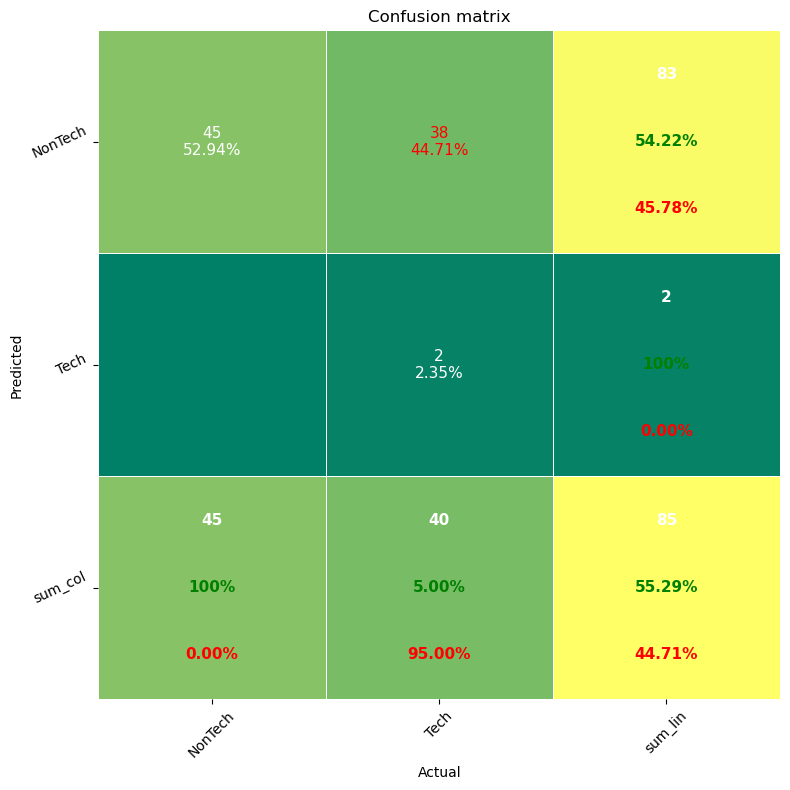

In [7]:
# Aufgabe 2
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn import metrics
import numpy as np
import pandas as pd
from pretty_confusion_matrix import pp_matrix
import matplotlib.pyplot as plt

tags = ["Tech" for i in range(countnews['testTech'])] + ["NonTech" for i in range(countnews['testNonTech'])] # c
resultsTech = [c1.predictionResult(news).get("prediction") for news in feeds.get("testTech")]
resultsNonTech = [c1.predictionResult(news).get('prediction') for news in feeds.get("testNonTech")]
results = resultsTech + resultsNonTech


print("resultsTech:", "correct:", resultsTech.count("Tech"), "incorrect:" , resultsTech.count("NonTech"))
print("resultsNonTech:", "correct:",resultsNonTech.count("NonTech"), "incorrect:", resultsNonTech.count("Tech"))
print("")
print("Confusion Matrix:",confusion_matrix(tags, results))
print("Accuracy:", accuracy_score(tags, results))
print("")
print("Precision Tech:", precision_score(tags, results, pos_label="Tech"))
print("Precision NonTech:", precision_score(tags, results, pos_label="NonTech"))
print("")
print("Recall Tech:", recall_score(tags, results, pos_label="Tech"))
print("Recall NonTech:", recall_score(tags, results, pos_label="NonTech"))
print("")
print("F1-Score Tech:", f1_score(tags, results, pos_label="Tech"))
print("F1-Score NonTech:", f1_score(tags, results, pos_label="NonTech"))
print("")
print(metrics.classification_report(tags, results))

# For some reason we had to flip around the order of the tags maybe coz there are more NonTech than Tech
df= pd.DataFrame(confusion_matrix(tags, results), index=[ 'NonTech','Tech'], columns=[ 'NonTech','Tech'])
#cmap = 'GnBu'
cmp=plt.cm.summer
pp_matrix(df, cmap=cmp)


In [8]:
# TESTING if we are right haha
PrecisionTech = 0.7346938775510204
PrecisionNonTech = 0.8888888888888888

RecallTech= 0.9
RecallNonTech= 0.7111111111111111

F1ScoreTech =  0.8089887640449438
F1ScoreNonTech = 0.7901234567901234

F1T = 2* (PrecisionTech * RecallTech) / (PrecisionTech + RecallTech)
F1NT = 2* (PrecisionNonTech * RecallNonTech) / (PrecisionNonTech + RecallNonTech)
print("F1T:", F1T)
print("F1NT:", F1NT)

F1T: 0.8089887640449438
F1NT: 0.7901234567901234


# 4.
Um die Klassifikation zu verbessern kann man zu Beginn alle Füllwörter entfernen. Diese haben keine Aussgakraft über die Art des Textes.   
Bsp. "er, sie, du, wir, und, weil" --> anhan dieser Wörter kann man nicht erkennen worum es im Text geht. "Computer, CPU, verkabeln" --> anhand dieser Wörter kann viel besser erkannt werden worum er sich vermutlich hadelt.   
Außerdem kann man versuchen Rechtscheibfehler zu korrigieren um sicher zu stellen das jedes Wort im Text zur Klassifizierung beitragen kann.   
## Stemming
Des weiteren können wir Algorithmen wie Stemming oder Lemmatiazation anwenden. Mit ihnen lassen sich Texte normalisieren.   
Stemming ist ein Algorithmus, der immer die Suffixe entfernt und nur den Wortstamm beibehält. 
Im unteren Beispiel wird aus den verschiedenen Zeitformen "wait", "waiting", "waited", "waits" der Wortstamm ,"wait" beibehalten.   
## Overstemming bzw. Understemming
Dennoch kann es hier durch Over-/Understemming zu Fehlern kommen. In dem darunterführenden Beispiel ist das Overstemming sichtbar, da die Wörter "university", "universal", "universe" alle eine unterschiedliche Bedeutung haben, dennoch durch das Stemming alle zu ,,univers" werden.
## Lemming
Lemming ist ein Algorhitmus, der die Fehler vom Over- und Underfitting reduzieren soll, indem er auch überprüft ob das Wort ein Adjekvtiv, Substantiv oder Verb ist.
Zu nächst wird das Wort mit einem Wörterbuch, der jeweligen Sprache abgeglichen, wenn so kein Treffer erfolgt wird das Wort auseinander genommen und geschaut ob somit Treffer entstehen. Beispiel "getroffen" wird somit geanu wie "treffen" zu dem Wort "treff" oder das Wort "better" wird somit zu "good".
Dieser Algorihtmus ist allerdings sehr Zeitaufwändig, da entweder alle Wörter im Wörtbuch verglichen oder das Wort aufgetrennt und danach wieder verglichen werden müssen. 

In [10]:
# Quelle https://griesshaber.pages.mi.hdm-stuttgart.de/nlp/02normalisation/03StemLemma.html
from textblob import TextBlob
w=TextBlob("sentense is not tru")
wcorr=w.correct()
wcorr

TextBlob("sentence is not true")

In [11]:
from nltk.stem import PorterStemmer

# Liste mit verschiedenen Zeitformen von dem verb ,,wait''
words= ["wait", "waiting", "waited", "waits"]
newWords=[]
print("Alte Liste: ", words)

ps =PorterStemmer()

for w in words:
    rootWord=ps.stem(w)
    newWords.append(rootWord)
    
print("normalisierte Liste: " , newWords)

Alte Liste:  ['wait', 'waiting', 'waited', 'waits']
normalisierte Liste:  ['wait', 'wait', 'wait', 'wait']


In [12]:
# Liste mit verschiedenen Zeitformen von dem verb ,,universe''
o_words= ["university", "universal", "universe"]
newWords_o=[]
print("Bsp. Overstemming")
print("Alte Liste ", o_words)

ps =PorterStemmer()

for w in o_words:
    rootWords=ps.stem(w)
    newWords_o.append(rootWords)
    
print("Neue Liste " , newWords_o)

Bsp. Overstemming
Alte Liste  ['university', 'universal', 'universe']
Neue Liste  ['univers', 'univers', 'univers']


In [13]:
from textblob import TextBlob
import nltk
import textblob_de

myBlob5=textblob_de.TextBlobDE("Wir werden Datamining mit einer sehr guten Note bestanden haben.")
for word in myBlob5.words.lemmatize():
    print(word)

wir
werden
Datamining
mit
ein
sehr
guten
Note
bestehen
haben


In [14]:
from HanTa import HanoverTagger as ht
import nltk

def getWords_improved(doc):
    tagger = ht.HanoverTagger('morphmodel_ger.pgz')
    wordsImproved = dict()
    result = re.findall(r'\w+', doc.lower())
    for word in result:
        lemmaWord = tagger.analyze(word, taglevel = 1)[0]
        wordsImproved[lemmaWord] = 1
    return wordsImproved

#Test
words = getWords_improved("test. Test . asd .asdae2asd .asfas wortmitÜ!")
print(words)

test_string = "test. Test . asd .asdae2asd .asfas wortmitÜ!"
getwords(test_string)

{'Test': 1, 'Asd': 1, 'Asdae2asd': 1, 'Asfa': 1, 'Wortmitü': 1}


{'test': 1, 'asd': 1, 'asdae2asd': 1, 'asfas': 1, 'wortmitü': 1}

In [15]:
print(countnews)
print({cat: len(feeds[cat]) for cat in feeds.keys()})

c1 = Classifier(getWords_improved, ["Tech", "NonTech"])
for news in feeds.get("trainTech"):
    c1.train(news, 'Tech')
for news in feeds.get("trainNonTech"):
    c1.train(news, 'NonTech')

{'tech': 80, 'nontech': 102, 'testTech': 40, 'testNonTech': 45}
{'trainTech': 80, 'trainNonTech': 102, 'testTech': 40, 'testNonTech': 45}


resultsTech: correct: 2 incorrect: 38
resultsNonTech: correct: 45 incorrect: 0

Confusion Matrix: [[45  0]
 [38  2]]
Accuracy: 0.5529411764705883

Precision Tech: 1.0
Precision NonTech: 0.5421686746987951

Recall Tech: 0.05
Recall NonTech: 1.0

F1-Score Tech: 0.09523809523809523
F1-Score NonTech: 0.7031249999999999

              precision    recall  f1-score   support

     NonTech       0.54      1.00      0.70        45
        Tech       1.00      0.05      0.10        40

    accuracy                           0.55        85
   macro avg       0.77      0.53      0.40        85
weighted avg       0.76      0.55      0.42        85



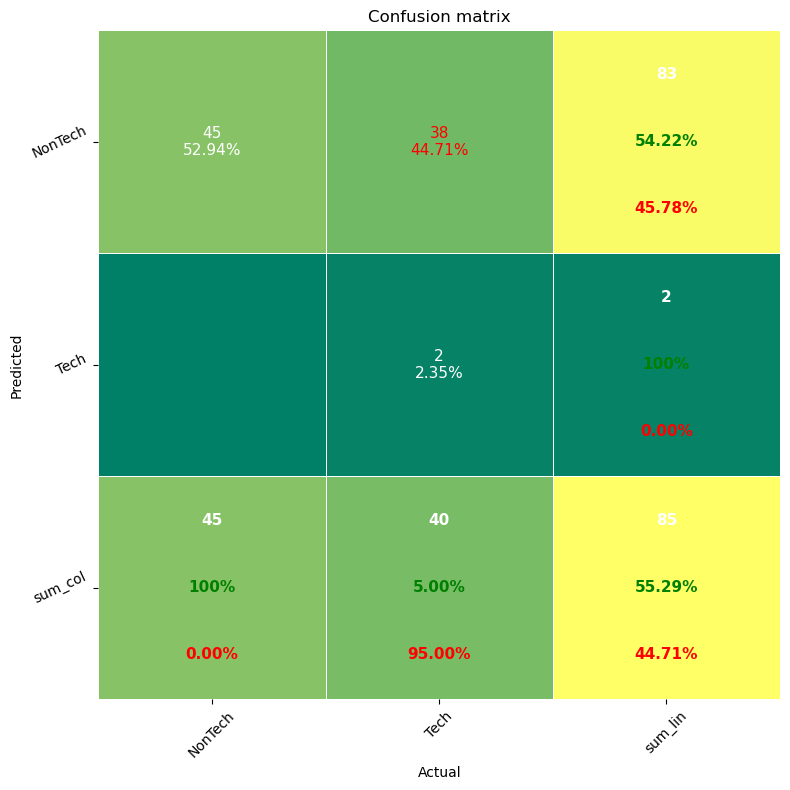

In [16]:
tags = ["Tech" for i in range(countnews['testTech'])] + ["NonTech" for i in range(countnews['testNonTech'])] # c
resultsTech = [c1.predictionResult(news).get("prediction") for news in feeds.get("testTech")]
resultsNonTech = [c1.predictionResult(news).get('prediction') for news in feeds.get("testNonTech")]
results = resultsTech + resultsNonTech


print("resultsTech:", "correct:", resultsTech.count("Tech"), "incorrect:" , resultsTech.count("NonTech"))
print("resultsNonTech:", "correct:",resultsNonTech.count("NonTech"), "incorrect:", resultsNonTech.count("Tech"))
print("")
print("Confusion Matrix:",confusion_matrix(tags, results))
print("Accuracy:", accuracy_score(tags, results))
print("")
print("Precision Tech:", precision_score(tags, results, pos_label="Tech"))
print("Precision NonTech:", precision_score(tags, results, pos_label="NonTech"))
print("")
print("Recall Tech:", recall_score(tags, results, pos_label="Tech"))
print("Recall NonTech:", recall_score(tags, results, pos_label="NonTech"))
print("")
print("F1-Score Tech:", f1_score(tags, results, pos_label="Tech"))
print("F1-Score NonTech:", f1_score(tags, results, pos_label="NonTech"))
print("")
print(metrics.classification_report(tags, results))

# For some reason we had to flip around the order of the tags maybe coz there are more NonTech than Tech
df= pd.DataFrame(confusion_matrix(tags, results), index=[ 'NonTech','Tech'], columns=[ 'NonTech','Tech'])
#cmap = 'GnBu'
cmp=plt.cm.summer
pp_matrix(df, cmap=cmp)

Zu erwarten wäre eine kleine Verbesserung. Leider können wir den Untrerschied nicht wirklich erkennen da wie oben genannt der Datensatz durch Black Friday verfälscht wurde und eine kleine Änderung bei wesentlich mehr Daten sichtbarer wäre. 
Ein Größerer Datensatz über einen längeren Zeitraum wäre an dieser Stelle sehr hilfreich gewesen.
Aber immerhin, wenn wir Tech vorhersagen ist es auch Tech.

In [17]:
# Spannend was man so findent ...

for news in feeds.get("testTech"):
    if news.count("Erotik") > 0:
        print(news)

Erotik, Pornos und NSFW: Unstable Diffusion trainiert KI für pornografische Bilder Mithilfe der KI Stable Diffusion trainiert sich eine Community ihre eigene Software. Damit sollen pornografische Bilder generiert werden. ( Deep Learning ,  KI )  
